# Treinamento

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

# 1. Carregar o dataset Iris
iris = load_iris()
X = iris.data
y_true = iris.target  # Etiquetas verdadeiras para comparação

# 2. Pré-processamento dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Definir e Treinar o Modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# 4. Avaliação dos Clusters
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print(f"Inércia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette_avg:.2f}")

# 5. Salvar o modelo e o escalador
with open("kmeans_model.pkl", "wb") as model_file:
    pickle.dump(kmeans, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

Inércia: 191.02
Silhouette Score: 0.48


# Predição

Acurácia: 0.67


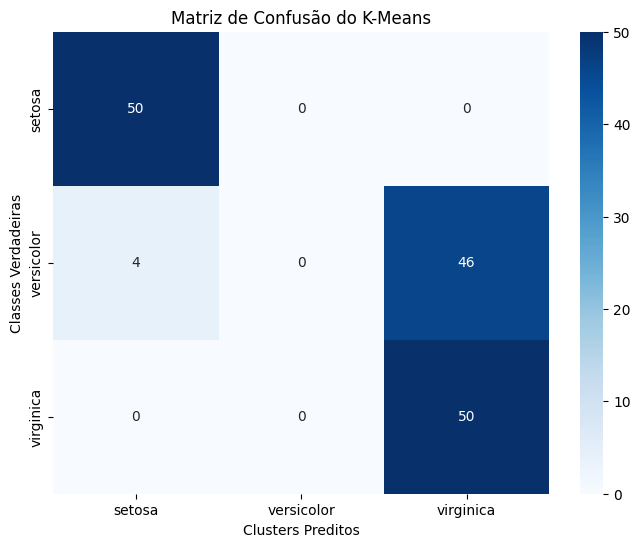

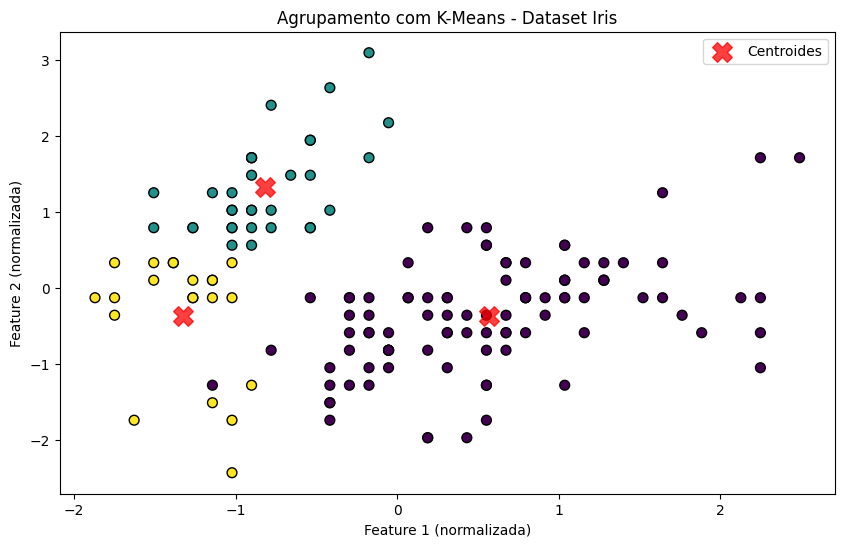

In [5]:
# 1. Carregar o dataset Iris para avaliação
iris = load_iris()
X = iris.data
y_true = iris.target  # Etiquetas verdadeiras para comparação

# 2. Carregar o modelo K-Means e o escalador
with open("kmeans_model.pkl", "rb") as model_file:
    kmeans = pickle.load(model_file)

with open("scaler.pkl", "rb") as scaler_file:
    scaler = pickle.load(scaler_file)

# 3. Pré-processar os dados com o escalador carregado
X_scaled = scaler.transform(X)

# 4. Realizar a predição com o modelo K-Means
y_pred = kmeans.predict(X_scaled)

# 5. Ajustar os rótulos para facilitar a comparação
labels = np.zeros_like(y_pred)
for i in range(3):
    mask = (y_pred == i)
    labels[mask] = mode(y_true[mask])[0]

# 6. Avaliação das Métricas
accuracy = accuracy_score(y_true, labels)
conf_matrix = confusion_matrix(y_true, labels)

print(f"Acurácia: {accuracy:.2f}")

# 7. Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Clusters Preditos")
plt.ylabel("Classes Verdadeiras")
plt.title("Matriz de Confusão do K-Means")
plt.show()

# 8. Visualização dos Clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroides')
plt.xlabel("Feature 1 (normalizada)")
plt.ylabel("Feature 2 (normalizada)")
plt.title("Agrupamento com K-Means - Dataset Iris")
plt.legend()
plt.show()